In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pqm import pqm_chi2, pqm_pvalue
from scipy.stats import norm, chi2, uniform, kstest

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
plt.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rc("text", usetex=True)

Create a distribution, and sample from it twice

In [2]:
class TimeSeriesModel:
    def __init__(self, a = 0., sigma=1., nt=100):
        self.t = np.linspace(0, 10, nt)
        self.a = a
        self.sigma = sigma
        
    def generate_samples(self, num_samples):
        # Generate samples from each component
        y = self.a * np.cos(self.t) + self.sigma * np.random.randn(num_samples, len(self.t))
        return y


In [3]:
num_repeats = 20
gmm_null = TimeSeriesModel(a = 0)

amps = np.logspace(-2, 0, 20)
chisqs_mean = np.zeros_like(amps)
chisqs_std = np.zeros_like(amps)

for i, a in enumerate(amps):
    gmm = TimeSeriesModel(a = a)
    null_samples = gmm_null.generate_samples(num_samples=5000)
    y_samples = gmm.generate_samples(num_samples=5000)
    zs = []
    dof_array = []
    for _ in range(num_repeats):
        z, dof = pqm_chi2(y_samples, null_samples)
        zs.append(z)
        dof_array.append(dof)
        
    chisqs_mean[i] = np.median(zs)
    chisqs_std[i] = np.std(zs)
    print(a, chisqs_mean[i], chisqs_std[i], np.unique(dof_array))

0.01 100.99559064512334 13.845013475500258 [99]
0.012742749857031334 100.07091552536102 14.673736923650091 [99]
0.016237767391887217 99.55245775954504 9.77237355712437 [99]
0.0206913808111479 98.54194846186275 9.991873771410098 [99]
0.026366508987303583 106.30883927782415 9.8750712444049 [99]
0.03359818286283781 108.48026467825926 14.780248642205814 [99]
0.04281332398719394 115.56951070157446 12.75039913249369 [99]
0.0545559478116852 117.01397073136013 18.179616311729703 [99]
0.06951927961775606 127.78913438873417 15.13656818334652 [99]
0.08858667904100823 155.04083362748054 27.73763483675903 [99]
0.11288378916846889 177.5918332539418 26.712999074230577 [99]
0.14384498882876628 212.78344540202625 30.52450604317779 [99]
0.18329807108324356 308.99272298400643 73.9589495561109 [99]
0.23357214690901212 467.946102016578 82.06943497094284 [99]
0.29763514416313175 654.0535171332743 87.53183304677671 [99]
0.37926901907322497 912.1253817202387 190.14964573396756 [99]
0.4832930238571752 1374.786

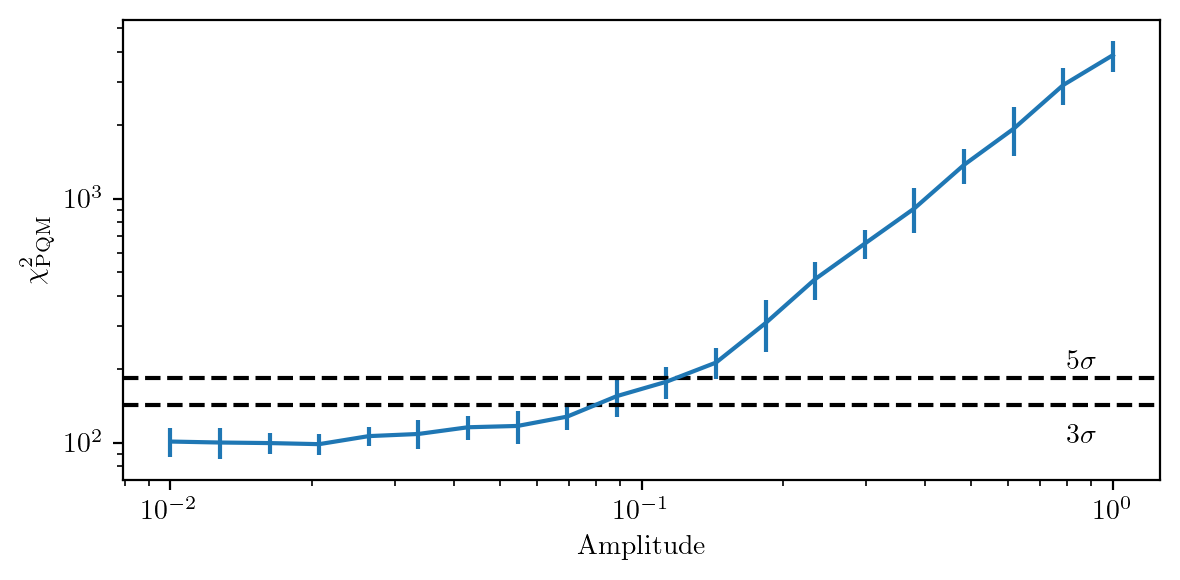

In [4]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.errorbar(amps, chisqs_mean, yerr=chisqs_std)
ax.axhline(chi2.ppf(0.997300203936740, 99), ls='--', color='k')
ax.axhline(chi2.ppf(0.999999426696856, 99), ls='--', color='k')
ax.text(0.8, 100, r'$3 \sigma$')
ax.text(0.8, 200, r'$5 \sigma$')
ax.set_xlabel('Amplitude')
ax.set_ylabel('$\chi^2_{\mathrm{ PQM}}$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.tight_layout()
plt.show()

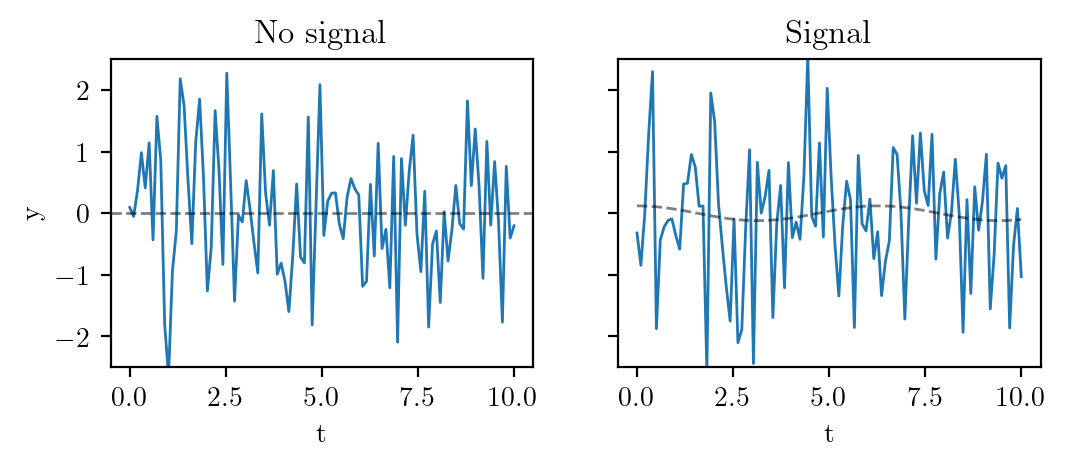

In [5]:
gmm = TimeSeriesModel(a = 0.12)
gmm_null = TimeSeriesModel(a = 0)
x_samples = gmm.generate_samples(num_samples=2)
null_samples = gmm_null.generate_samples(num_samples=2)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(6, 2), sharex=True, sharey=True)
axs[0].plot(gmm.t, null_samples[0], lw=1)
axs[0].axhline(0, color='k', lw=1, ls='--', alpha=0.5)
axs[0].set_ylim([-2.5, 2.5])
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].set_title('No signal')

axs[1].plot(gmm.t, x_samples[0], lw=1)
axs[1].plot(gmm.t, gmm.a * np.cos(gmm.t), color='k', lw=1, ls='--', alpha=0.5)
axs[1].set_ylim([-2.5, 2.5])
axs[1].set_title('Signal')
axs[1].set_xlabel('t')

plt.show()

# Using p-value

In [6]:
num_repeats = 20
gmm_null = TimeSeriesModel(a = 0)

amps = np.logspace(-2, 0, 20)
p_val_mean = np.zeros_like(amps)
p_val_std = np.zeros_like(amps)

for i, a in enumerate(amps):
    gmm = TimeSeriesModel(a = a)
    null_samples = gmm_null.generate_samples(num_samples=5000)
    y_samples = gmm.generate_samples(num_samples=5000)
    p_val = []
    for _ in range(num_repeats):
        pval = pqm_pvalue(y_samples, null_samples)
        p_val.append(pval)
    if np.median(p_val) > 0.01:
        print("Do not reject the null hypothesis")
    else:
        print("Reject the null hypothesis")
    p_val_mean[i] = np.median(p_val)
    p_val_std[i] = np.std(p_val)
    print(a, np.median(p_val), np.std(p_val))

Do not reject the null hypothesis
0.01 0.349232048943449 0.2269606786582341
Do not reject the null hypothesis
0.012742749857031334 0.5390222119319008 0.26625479366840754
Do not reject the null hypothesis
0.016237767391887217 0.4891528043881175 0.29117328945396015
Do not reject the null hypothesis
0.0206913808111479 0.35967753199052643 0.23406171528994327
Do not reject the null hypothesis
0.026366508987303583 0.2576006465639219 0.31988643207214745
Do not reject the null hypothesis
0.03359818286283781 0.18091598601679967 0.2578864569808977
Do not reject the null hypothesis
0.04281332398719394 0.3000002143333522 0.24112773037401225
Do not reject the null hypothesis
0.0545559478116852 0.19594494407995383 0.1855310887671391
Do not reject the null hypothesis
0.06951927961775606 0.014826646061594999 0.19203154571928074
Reject the null hypothesis
0.08858667904100823 0.0007933171047497937 0.024610716642334357
Reject the null hypothesis
0.11288378916846889 1.0656671690820026e-05 0.00630236483078

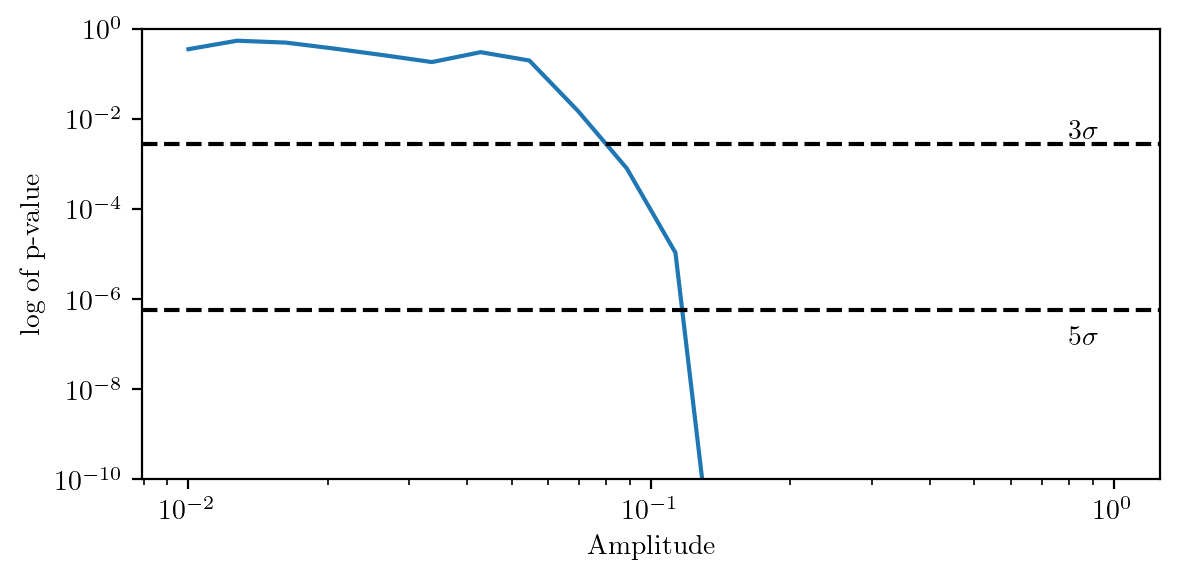

In [7]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(amps, p_val_mean)
ax.axhline(1 - 0.997300203936740, ls='--', color='k')  # 3 sigma equivalent p-value
ax.axhline(1 - 0.999999426696856, ls='--', color='k')  # 5 sigma equivalent p-value
ax.text(0.8, 0.01, r'$3 \sigma$', verticalalignment='top')
ax.text(0.8, 0.0000001, r'$5 \sigma$')
ax.set_xlabel('Amplitude')
ax.set_ylabel('log of p-value')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-10, 1)  # Set the y-axis limits
plt.tight_layout()
plt.show()
